# Assignment 2:  - Kai Ponel & Hannan Mahadik 

# Global Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Part 1: Markov Chain Monte Carlo (MCMC)

Define a transition matrix A as in the book. This should be a stochastic matrix, i.e. each column must sum to 1. You can choose n as you wish; it’s okay to stick with a small number (say, n=5). You can create the matrix from random values, or write it down by hand. For theoretical reasons, it’s best to have no 0s in the matrix.

In [ ]:
def create_stochastic_matrix(n):
    # # Create an n*n matrix of random values
    matrix = np.random.rand(n, n)
    
    # Normalize the columns so that they sum to 1
    col_sums = matrix.sum(axis=0)
    stochastic_matrix = matrix / col_sums[np.newaxis, :]
    
    return stochastic_matrix

Create an arbitrary initial distribution v(0), i.e. an n-element vector with elements summing to 1.

In [ ]:
def create_initial_distribution(n):
    # Create an n-element vector of random values
    v = np.random.rand(n)
    
    # Normalize the vector so that its elements sum to 1
    v = v / np.sum(v)
    
    return v

## Simple Markov Chain

In [ ]:
# Parameters for the code below
n = 100 # Number of states 
start_state = 0 
sampled = [start_state] # List to keep track of state transitions
amount_samples = 1000000 # With 1 million instead of 100k samples the results are a lot better!
amount_iters_v_times_A = 1000 # How many times the approx.-calc. v*A should be run

A = create_stochastic_matrix(n)

Try different starting values of v. How does this influence v'?

Did not test much yet, but it appears that values are somewhat dragged in an equillibrium. Bigger values are reduced while smaller values seem to increase. In the end almost all of the values are between .1 and .3, sometimes there are outliers.


In [ ]:
# Calc v*A with set params
v = create_initial_distribution(n)
print("Initial random Matrix A: {}".format(A))
print("Initial random Vector V: {}".format(v))
for i in range(amount_iters_v_times_A):
  v = A@v
  print("v[{}]: {}".format(i+1, v))


Streaming output truncated to the last 5000 lines.
 0.01053124 0.01019846 0.00983843 0.00982429 0.01014047 0.01121055
 0.01072234 0.00976547 0.00981568 0.00936726]
v[707]: [0.00990257 0.00941605 0.01047748 0.01054345 0.01016162 0.01003668
 0.00927504 0.01044818 0.01022011 0.00941033 0.01064059 0.0100149
 0.00961045 0.01023528 0.01134421 0.01021592 0.00992118 0.01019219
 0.0099772  0.00977652 0.00963403 0.00951801 0.00956766 0.00925752
 0.01019319 0.0098212  0.00949753 0.01105384 0.0098556  0.01019971
 0.00951562 0.01019185 0.00939505 0.01018796 0.01009506 0.00987843
 0.00923413 0.0106092  0.00996651 0.01034442 0.01011182 0.00903144
 0.00904744 0.01074127 0.0093711  0.0107462  0.01021336 0.01014255
 0.01017633 0.01038149 0.00955378 0.01065948 0.01015088 0.0099008
 0.01055431 0.01038479 0.00984821 0.00968312 0.00971675 0.00978961
 0.00992721 0.01079295 0.00933269 0.00950244 0.01026697 0.01013439
 0.00912665 0.01043113 0.00974198 0.010995   0.01010086 0.01050732
 0.01000434 0.0097729  0.0

In [ ]:
current_state = start_state
for i in range(amount_samples):
  col = A[:, current_state] # Get the col corresponding to the current state
  random_index = np.where(np.random.multinomial(1, col))[0][0] # Roll a random next state given the columns probabilities
  sampled.append(random_index) # Store the result in the list
  current_state = random_index # Update the current state

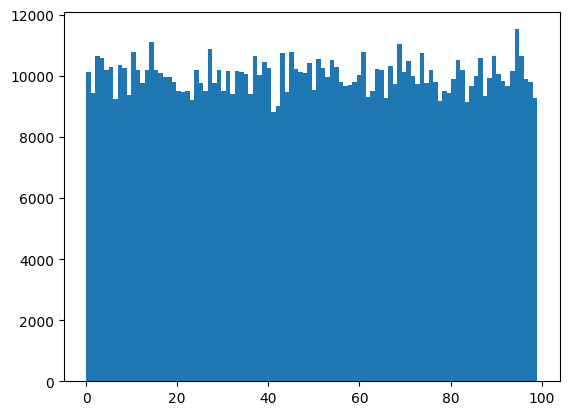

In [ ]:
## Plotting the results
plt.hist(sampled, bins=n)
plt.show()

In [ ]:
# Function to count occurrences of transitions
def count_occurrences(x, lst):
    counts = np.zeros(x)
    for i in lst:
        counts[i] += 1
    return counts

# Data of the histogram
hist_data = count_occurrences(n, sampled)

# Devided by amount of samples taken
hist_data_norm = hist_data/amount_samples

In [ ]:
# Helper function to plot results 
def plot_bars(markov_chain_samples, v_a_approx):
    bar_width = 0.25
    index = np.arange(len(markov_chain_samples))
    
    plt.bar(index, markov_chain_samples, bar_width, color='b', label='Markov Chain')
    plt.bar(index + bar_width, v_a_approx, bar_width, color='g', label='v*A')
    plt.bar(index + 2*bar_width, abs(markov_chain_samples-v_a_approx), bar_width, color='r', label='Difference')
    
    plt.xlabel('state (gl reading this)')
    plt.ylabel('relative occourance / probability')
    plt.title('Difference of Markov Chain samples and v*A approx.')
    plt.xticks(index + bar_width, index)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
  

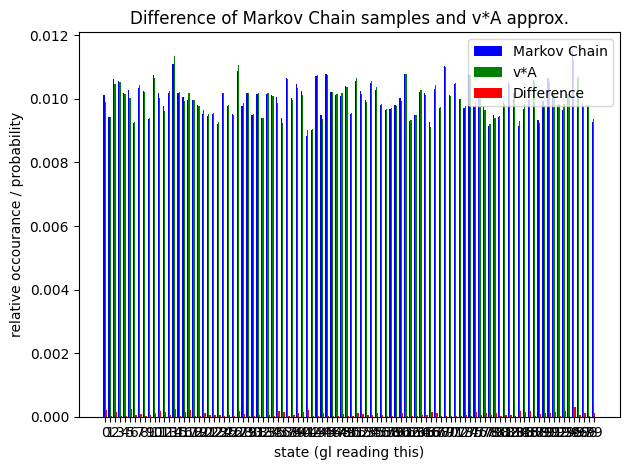

In [ ]:
plot_bars(hist_data_norm, v)

# Part 2: Gibbs Sampling & Mixing

## Imports

In [ ]:
import tensorflow_probability as tfp
tfd = tfp.distributions

## Main
(The code below is based on the starter-code provided)

In [ ]:
# here is an example for a 2D mixture of Gaussians.
# we need a categorical distribution representing the mixture weights (here 0.5 for both components).
# as mixture components, we use a multivariate normal with diagonal covariance matrix.
# basically one component has mean [-location, -location], second component has mean [location location].
# both components use the same standard deviation (scale), although this could be changed.

location = 1. # This is the mean
scale = 1. # This is the stdd.

# "balanced" Gaussian mixture
basic_distribution = tfd.MixtureSameFamily(tfd.Categorical(probs=[0.5, 0.5]), 
                                           tfd.MultivariateNormalDiag(loc=[[-location, -location], [location, location]],
                                                                      scale_identity_multiplier=scale))

In [ ]:
 # simple way to sample from this distribution
basic_distribution.sample()

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 0.43155265, -2.6627908 ], dtype=float32)>

Start with an arbitrary initial sample (e.g. a vector of 0s).

In [ ]:
initial_sample = np.zeros(2)

Set up a distribution. In order to be able to do any conditioning, this needs to be multivariate. For simplicity (and easy plotting), stick to a 2D distribution. Also, we want at least two components; these can be simple independent Gaussians

In [ ]:
gaussian1 = tfd.Normal(loc=-location, scale=scale)
gaussian2 = tfd.Normal(loc=location, scale=scale)

Now, repeatedly do the following: Sample a new value for x given the value for y. Then, sample a new value for y given the (new!) value for x. Since we now have sampled new values for both dimensions, we have essentially taken a new sample of our 2D distribution

In [ ]:
x = []
y = []

You should collect a reasonable number of samples (1000 or more) 

In [ ]:
prior_mixture_weight1 = 0.5 # for probs=[0.5, 0.5]; 
prior_mixture_weight2 = 0.5

for _ in range(1000): 
  # for the example of sampling x1 given x2, they can be computed like this
  mixing_score1 = prior_mixture_weight1 * gaussian1.prob(initial_sample[1]) # x1 given x2 -> x given y -> [1]
  mixing_score2 = prior_mixture_weight2 * gaussian2.prob(initial_sample[1])
  pi1 = mixing_score1 / (mixing_score1 + mixing_score2)
  pi2 = mixing_score2 / (mixing_score1 + mixing_score2)

  conditional_distribution = tfd.MixtureSameFamily(tfd.Categorical(probs=[pi1, pi2]), 
                                            tfd.Normal(loc=[-location, location], scale=scale))
  
  initial_sample[0] = np.array(conditional_distribution.sample())
  x.append(initial_sample[0])

  # for x2 given x1 you just flip it  -- use prob(x1) for the mixing scores.
  mixing_score1 = prior_mixture_weight1 * gaussian1.prob(initial_sample[0]) #x2 given x1 -> y given x -> [0]
  mixing_score2 = prior_mixture_weight2 * gaussian2.prob(initial_sample[0])
  pi1 = mixing_score1 / (mixing_score1 + mixing_score2)
  pi2 = mixing_score2 / (mixing_score1 + mixing_score2)

  conditional_distribution = tfd.MixtureSameFamily(tfd.Categorical(probs=[pi1, pi2]), 
                                            tfd.Normal(loc=[-location, location], scale=scale))

  initial_sample[1] = np.array(conditional_distribution.sample())
  y.append(initial_sample[1])

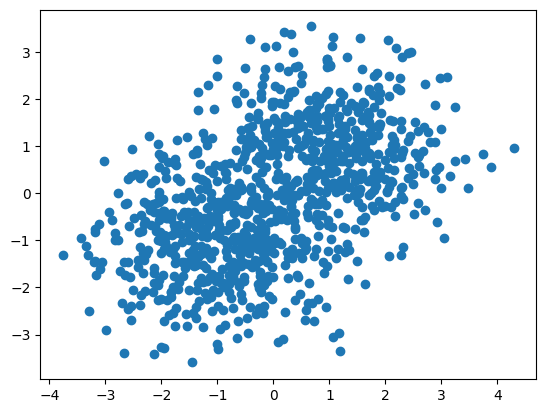

In [ ]:
plt.scatter(x, y)

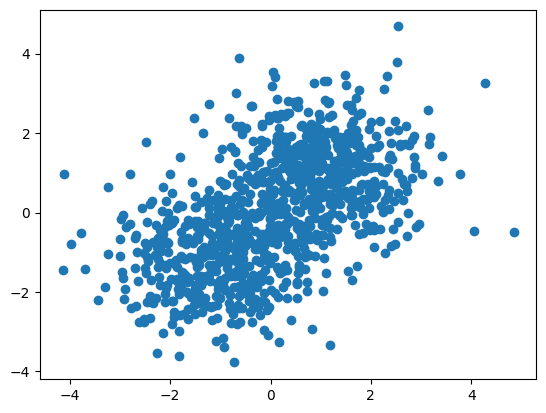

In [ ]:
x1 = []
y1 = []
z = []

for _ in range(1000): 
  z = np.array(basic_distribution.sample())

  x1.append(z[0])
  y1.append(z[1])

plt.scatter(x1, y1)

## Test with different values:

In [ ]:
def some_function(location1, location2, scale, iterations):

  initial_sample = np.zeros(2)

  gaussian1 = tfd.Normal(loc=location1, scale=scale)
  gaussian2 = tfd.Normal(loc=location2, scale=scale)

  x = []
  y = []

  prior_mixture_weight1 = 0.5  
  prior_mixture_weight2 = 0.5

  for _ in range(iterations): 
    # for the example of sampling x1 given x2, they can be computed like this
    mixing_score1 = prior_mixture_weight1 * gaussian1.prob(initial_sample[1]) # x1 given x2 -> [1]
    mixing_score2 = prior_mixture_weight2 * gaussian2.prob(initial_sample[1])
    pi1 = mixing_score1 / (mixing_score1 + mixing_score2)
    pi2 = mixing_score2 / (mixing_score1 + mixing_score2)

    conditional_distribution = tfd.MixtureSameFamily(tfd.Categorical(probs=[pi1, pi2]), 
                                              tfd.Normal(loc=[-location, location], scale=scale))
    
    initial_sample[0] = np.array(conditional_distribution.sample())
    x.append(initial_sample[0])

    # for x2 given x1 you just flip it  -- use prob(x1) for the mixing scores.
    mixing_score1 = prior_mixture_weight1 * gaussian1.prob(initial_sample[0])
    mixing_score2 = prior_mixture_weight2 * gaussian2.prob(initial_sample[0])
    pi1 = mixing_score1 / (mixing_score1 + mixing_score2)
    pi2 = mixing_score2 / (mixing_score1 + mixing_score2)

    conditional_distribution = tfd.MixtureSameFamily(tfd.Categorical(probs=[pi1, pi2]), 
                                              tfd.Normal(loc=[-location, location], scale=scale))

    initial_sample[1] = np.array(conditional_distribution.sample())
    y.append(initial_sample[1])

  plt.scatter(x, y)

### 10k; loc=2; s=1

In [ ]:
num_iters = 10000
location=2
scale=1

In [ ]:
basic_distribution = tfd.MixtureSameFamily(tfd.Categorical(probs=[0.5, 0.5]), 
                                           tfd.MultivariateNormalDiag(loc=[[-location, -location], [location, location]],
                                                                      scale_identity_multiplier=scale))

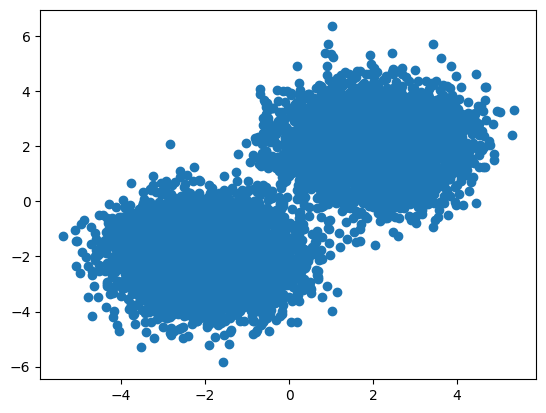

In [ ]:
x1 = []
y1 = []
z = []

for _ in range(num_iters): 
  z = np.array(basic_distribution.sample())

  x1.append(z[0])
  y1.append(z[1])

plt.scatter(x1, y1)

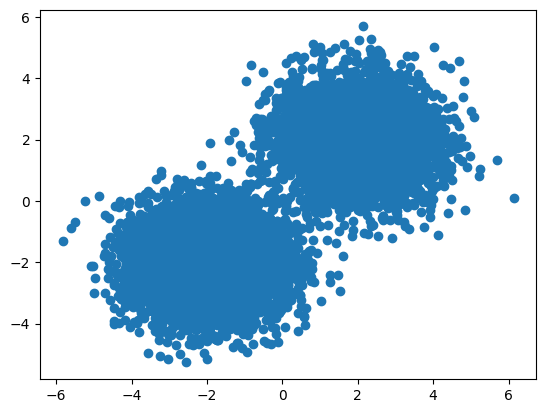

In [ ]:
some_function(-location,location,scale,num_iters)

### 50k loc=2, s=1

In [ ]:
num_iters = 50000
location=2
scale=1

In [ ]:
basic_distribution = tfd.MixtureSameFamily(tfd.Categorical(probs=[0.5, 0.5]), 
                                           tfd.MultivariateNormalDiag(loc=[[-location, -location], [location, location]],
                                                                      scale_identity_multiplier=scale))

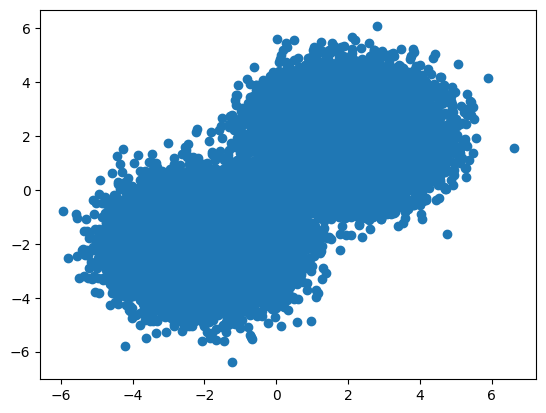

In [ ]:
x1 = []
y1 = []
z = []

for _ in range(num_iters): 
  z = np.array(basic_distribution.sample())

  x1.append(z[0])
  y1.append(z[1])

plt.scatter(x1, y1)

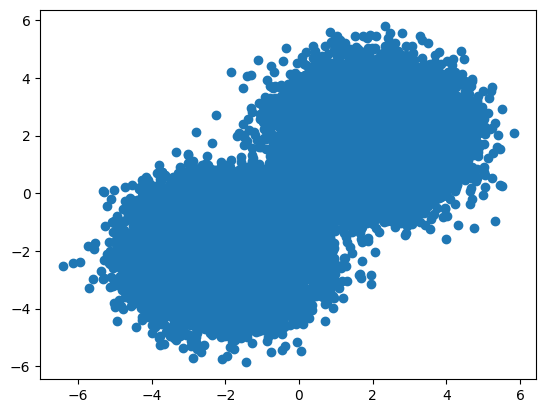

In [ ]:
some_function(-location,location,scale,num_iters)

### 5k; loc=5, s=1

In [ ]:
num_iters = 5000
location=5
scale=1

In [ ]:
basic_distribution = tfd.MixtureSameFamily(tfd.Categorical(probs=[0.5, 0.5]), 
                                           tfd.MultivariateNormalDiag(loc=[[-location, -location], [location, location]],
                                                                      scale_identity_multiplier=scale))

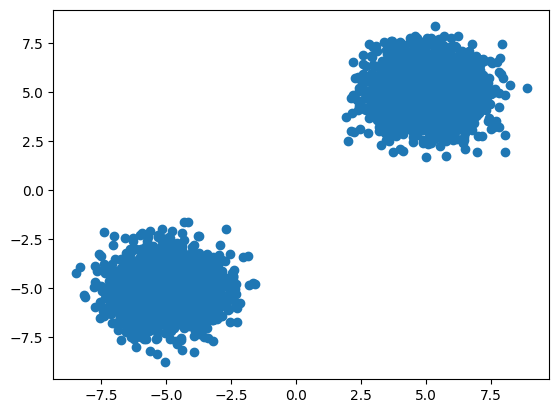

In [ ]:
x1 = []
y1 = []
z = []

for _ in range(num_iters): 
  z = np.array(basic_distribution.sample())

  x1.append(z[0])
  y1.append(z[1])

plt.scatter(x1, y1)

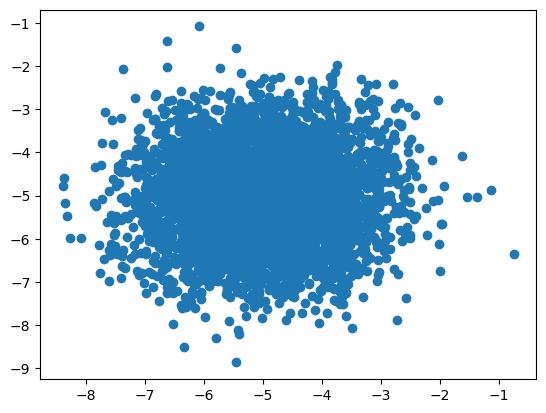

In [ ]:
some_function(-location,location,scale,num_iters)

### 10k; loc=2, s=2

In [ ]:
num_iters = 10000
location=2
scale=2

In [ ]:
basic_distribution = tfd.MixtureSameFamily(tfd.Categorical(probs=[0.5, 0.5]), 
                                           tfd.MultivariateNormalDiag(loc=[[-location, -location], [location, location]],
                                                                      scale_identity_multiplier=scale))

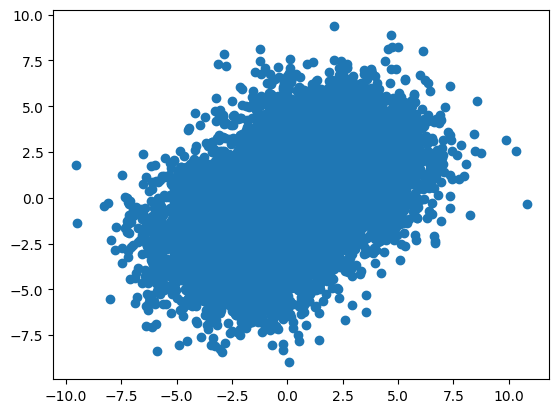

In [ ]:
x1 = []
y1 = []
z = []

for _ in range(num_iters): 
  z = np.array(basic_distribution.sample())

  x1.append(z[0])
  y1.append(z[1])

plt.scatter(x1, y1)

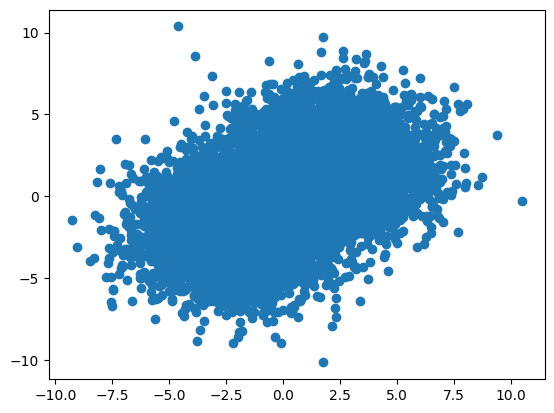

In [ ]:
some_function(-location,location,scale,num_iters)

# Extra

In [ ]:
# NOTE as long as you are using independent Gaussians (diagonal covariance), the conditional distributions
# have the SAME mean/standard deviation as the 2D one has, in that dimension.
# the ONLY thing that changes are the mixture weights.

# for the example of sampling x1 given x2, they can be computed like this
mixing_score1_x1x2 = prior_mixture_weight1 * gaussian1.prob(x2)
mixing_score2_x1x2 = prior_mixture_weight2 * gaussian2.prob(x2)
pi1_x1x2 = mixing_score1_x1x2 / (mixing_score1_x1x2 + mixing_score2_x1x2)
pi2_x1x2 = mixing_score2_x1x2 / (mixing_score1_x1x2 + mixing_score2_x1x2)

NameError: ignored

In [ ]:
# BUT NOW remember that we pretend that we can't actually sample from the above distribution.
# instead, we only sample conditional distributions p(x1 | x2) (or the other way around).

# since we sample one variable at a time, it's always a 1D Gaussian (tfd.Normal).
# the loc parameter looks a bit confusing: this is NOT a 2D Gaussian with mean (-location, location).
# instead, these are the locations for two SEPARATE 1D Gaussians, which are used for the mixture.
# both use the same scale.

normal_dist = tfd.Normal(loc=[-location, location], scale=scale)

In [ ]:
# the main issue is figuring out the mixture components pi1, pi2.
# the derivation for this can be found in the stackexchange answer linked in the assignment text.

# pi1 = mixture coefficient for the first distr. => a|b
# pi2 = mixture coefficient for the second distr. => b|a

# pi1 = pi_k * N(loc|)

conditional_distribution = tfd.MixtureSameFamily(tfd.Categorical(probs=[pi1, pi2]),
                                                 normal_dist)
conditional_distribution.sample()  # new x1

In [ ]:
# for x2 given x1 you just flip it  -- use prob(x1) for the mixing scores.
mixing_score1_x2x1 = prior_mixture_weight1 * gaussian1.prob(x1)
mixing_score2_x2x1 = prior_mixture_weight2 * gaussian2.prob(x1)
pi1_x2x1 = mixing_score1_x2x1 / (mixing_score1_x2x1 + mixing_score2_x2x1)
pi2_x2x1 = mixing_score2_x2x1 / (mixing_score1_x2x1 + mixing_score2_x2x1)

In [ ]:
normal_dist = tfd.Normal(loc=[-location, location], scale=scale)


vars = normal_dist.variables

print(vars)